In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("reihanenamdari/breast-cancer")

print("Path to dataset files:", path)

Path to dataset files: /Users/amandahernandez/.cache/kagglehub/datasets/reihanenamdari/breast-cancer/versions/1


In [4]:
df = pd.read_csv("breast_cancer.csv")


In [8]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [5]:
df.shape

(4024, 16)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In [7]:
df.isna().sum()/df.shape[0]*100

Age                       0.0
Race                      0.0
Marital Status            0.0
T Stage                   0.0
N Stage                   0.0
6th Stage                 0.0
differentiate             0.0
Grade                     0.0
A Stage                   0.0
Tumor Size                0.0
Estrogen Status           0.0
Progesterone Status       0.0
Regional Node Examined    0.0
Reginol Node Positive     0.0
Survival Months           0.0
Status                    0.0
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [9]:
df.sample()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1734,50,White,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,47,Positive,Positive,23,1,58,Alive


In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df[df.duplicated(keep= False)]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
213,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


👆 no se asume como duplicado porque es viable que existan dos mujeres que puedan tener las mismas caracteristicas 

<Axes: xlabel='Age', ylabel='Count'>

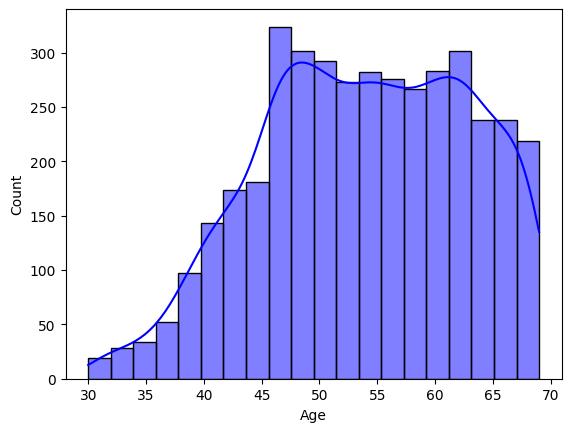

In [26]:
#Histograma de Edad
sns.histplot(df['Age'], bins=20, kde=True, color='blue')


<Axes: xlabel='Age'>

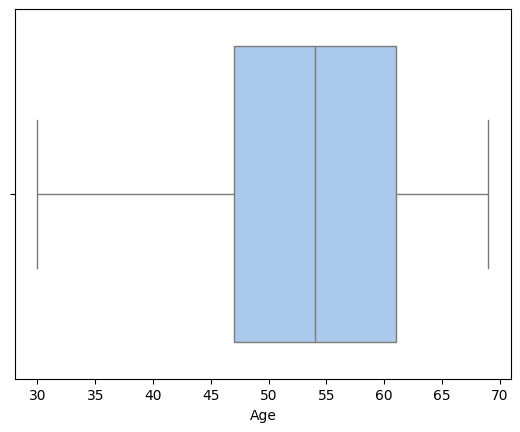

In [28]:
sns.boxplot(x='Age', data=df, palette='pastel')

In [29]:
df["Race"].value_counts()

Race
White    3413
Other     320
Black     291
Name: count, dtype: int64

In [30]:
df["Grade"].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [33]:
df["Grade"] = df["Grade"].replace({" anaplastic; Grade IV": "4"})



In [34]:
df["Grade"].unique()

array(['3', '2', '1', '4'], dtype=object)

In [35]:
df["Grade"] = df["Grade"].astype(int)


In [38]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                      int64
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [39]:
df.sample()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1908,59,White,Married,T3,N3,IIIC,Moderately differentiated,2,Regional,55,Positive,Positive,19,11,75,Alive


In [43]:
df["N Stage"].unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [45]:
df["6th Stage"].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [46]:
print(df.columns.tolist())


['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


In [47]:
df.columns = df.columns.str.strip()


In [48]:
df["T Stage"].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [49]:
df["T Stage"] = df["T Stage"].replace({"T1": "1", "T2" : "2", "T3" : "3", "T4" : "4"})

In [51]:
df["T Stage"] = df["T Stage"].astype(int)


In [52]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                    int64
N Stage                   object
6th Stage                 object
differentiate             object
Grade                      int64
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [53]:
df["N Stage"] = df["N Stage"].replace({"N1": "1", "N2" : "2", "N3" : "3"})

In [54]:
df["N Stage"] = df["N Stage"].astype(int)


In [55]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                    int64
N Stage                    int64
6th Stage                 object
differentiate             object
Grade                      int64
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [56]:
df["A Stage"].unique()

array(['Regional', 'Distant'], dtype=object)

In [57]:
df["Status"].unique()

array(['Alive', 'Dead'], dtype=object)

In [58]:
df["Estrogen Status"].unique()

array(['Positive', 'Negative'], dtype=object)

In [59]:
df.shape

(4024, 16)

In [60]:
df["Status"].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

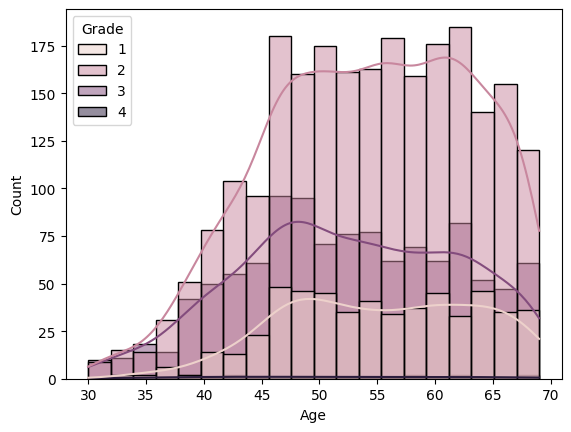

In [69]:
sns.histplot(data= df, x= "Age", hue= "Grade", bins=20, kde=True, color='blue')


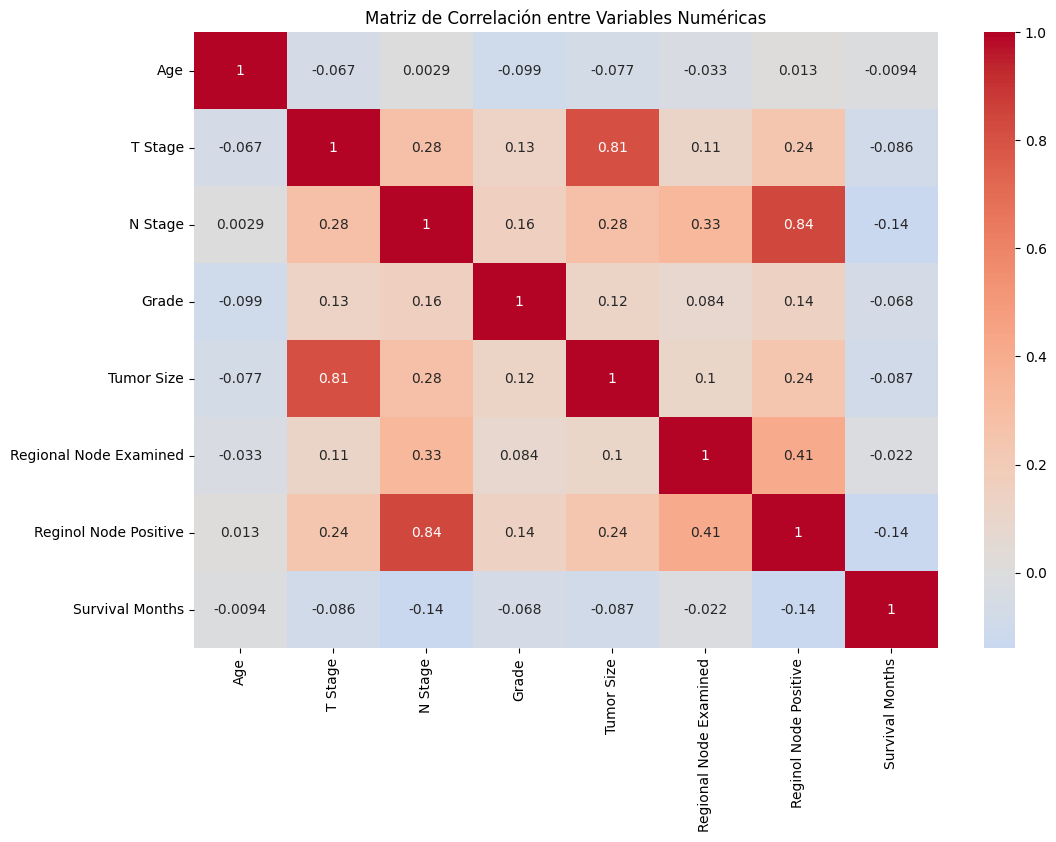

In [71]:
# Seleccionar variables numéricas relevantes
numeric_cols = ["Age", "T Stage" , "N Stage", "Grade", "Tumor Size" , "Regional Node Examined", "Reginol Node Positive", "Survival Months"]
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()




## Para correlacional en PoweBI
- N Stage con Reginol Node Positive 
- Tumor Size con T Stage

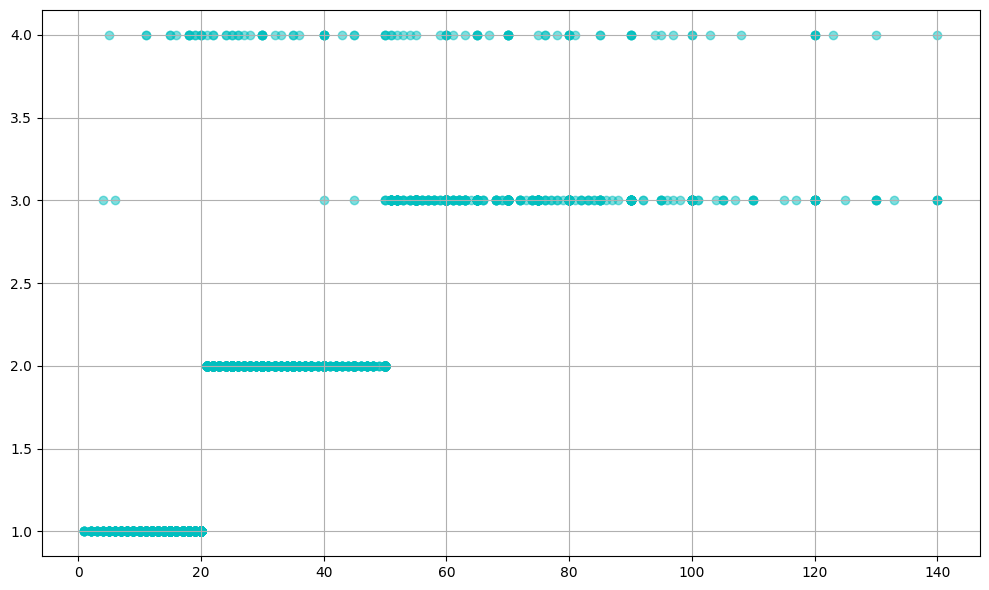

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Tumor Size"], df["T Stage"], color='c', alpha=0.5)


plt.grid(True)
plt.tight_layout()
plt.show()

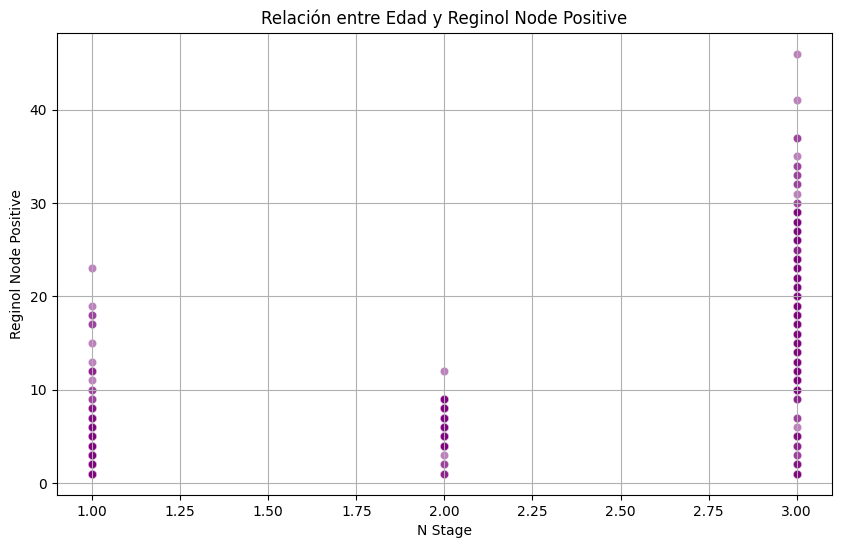

In [76]:
# Gráfico de dispersión: Edad vs Salario
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['N Stage'], y=df['Reginol Node Positive'], alpha=0.5, color='purple')
plt.title('Relación entre Edad y Reginol Node Positive')
plt.xlabel('N Stage')
plt.ylabel('Reginol Node Positive')
plt.grid(True)
plt.show()

In [77]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                    int64
N Stage                    int64
6th Stage                 object
differentiate             object
Grade                      int64
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object